In [0]:
import json
a=[]
for f in open('data.json'):
    a.append(json.loads(f))

In [0]:
headline=[a[i]['headline'] for i in range(len(a))]
is_sarcastic=[a[i]['is_sarcastic'] for i in range(len(a))]

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

TensorFlow 2.x selected.


In [5]:
df=pd.DataFrame({'headline':headline,'is_sarcastic': is_sarcastic})
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [0]:
token=Tokenizer()
token.fit_on_texts(df.headline)
word_index=token.word_index

In [7]:
len(word_index)

29656

In [0]:
def process(s):
    return tf.keras.preprocessing.sequence.pad_sequences(token.texts_to_sequences([s]), maxlen=maxlen)

In [0]:
maxlen=max([len(i.split()) for i in df.headline])

In [0]:
train_data=process(df.headline)

In [0]:
total=len(word_index)+1

In [136]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(total, 64, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        tf.keras.layers.Dropout(0.4), 
        tf.keras.layers.Dense(512, activation='softmax'),
        tf.keras.layers.Dropout(0.4), 
        tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 39, 64)            1898048   
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 256)               197632    
_________________________________________________________________
dropout_67 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_68 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 1026      
Total params: 2,228,290
Trainable params: 2,228,290
Non-trainable params: 0
___________________________________________

In [0]:
es=tf.keras.callbacks.EarlyStopping(monitor='accuracy')

In [138]:
history=model.fit(train_data, df.is_sarcastic, epochs=10, validation_split=0.2, callbacks=[es])

Train on 21367 samples, validate on 5342 samples
Epoch 1/10
21367/21367 [==============================] - 32s 1ms/sample - loss: 0.6730 - accuracy: 0.5822 - val_loss: 0.5695 - val_accuracy: 0.7499
Epoch 2/10
21367/21367 [==============================] - 28s 1ms/sample - loss: 0.6265 - accuracy: 0.6476 - val_loss: 0.6255 - val_accuracy: 0.6638
Epoch 3/10
21367/21367 [==============================] - 28s 1ms/sample - loss: 0.6058 - accuracy: 0.6620 - val_loss: 0.6217 - val_accuracy: 0.6674
Epoch 4/10
21367/21367 [==============================] - 28s 1ms/sample - loss: 0.6018 - accuracy: 0.7095 - val_loss: 0.6217 - val_accuracy: 0.6640
Epoch 5/10
21367/21367 [==============================] - 28s 1ms/sample - loss: 0.5673 - accuracy: 0.7412 - val_loss: 0.4778 - val_accuracy: 0.7991
Epoch 6/10
21367/21367 [==============================] - 28s 1ms/sample - loss: 0.4113 - accuracy: 0.8600 - val_loss: 0.4322 - val_accuracy: 0.8160
Epoch 7/10
21367/21367 [==============================] -

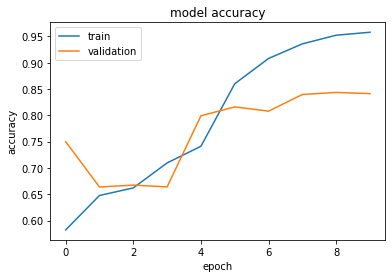

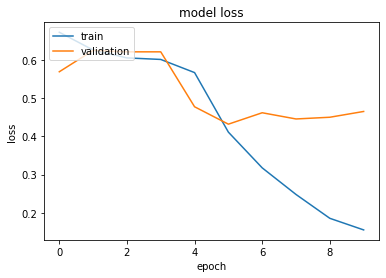

In [139]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()